In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
net = pd.read_csv('netflix_data_c.csv')

In [4]:
net = net.rename(columns = {"release_year": "year"})

In [5]:
net.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added', 'year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_year = scaler.fit_transform(net['year'].values.reshape(-1,1))

In [8]:
scaled_year.shape

(2003, 1)

In [9]:
net.shape

(2003, 10)

In [10]:
net['scaled_year'] = scaled_year

In [12]:
net['scaled_year'].describe()

count    2.003000e+03
mean     6.404540e-15
std      1.000250e+00
min     -6.791116e+00
25%      3.726788e-03
50%      3.865349e-01
75%      4.822369e-01
max      6.736409e-01
Name: scaled_year, dtype: float64

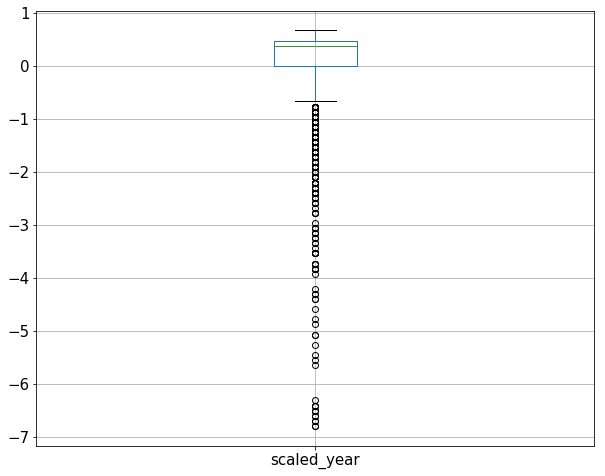

In [13]:
net.boxplot(figsize=(10,8), fontsize=15, column=['scaled_year']);

In [15]:
outliers = np.where(net['scaled_year'] < -5)
outliers

(array([ 448,  458,  460,  473,  475,  651,  652,  653,  654,  655,  656,
         658,  659,  660,  661,  662,  914,  932, 1334]),)

In [16]:
net.iloc[outliers]

,show_id,type,title,director,country,date_added,year,rating,duration,listed_in,scaled_year
448,60002033,1,Butterfield 8,Daniel Mann,2,"November 1, 2019",1960,3,108 min,"Classic Movies, Dramas, Romantic Movies",-5.068480
458,516788,1,Forbidden Planet,Fred M. Wilcox,2,"November 1, 2019",1956,1,98 min,"Action & Adventure, Classic Movies, Sci-Fi & F...",-5.451288
460,542137,1,Gigi,"Vincente Minnelli, Charles Walters",2,"November 1, 2019",1958,1,115 min,"Classic Movies, Comedies, Music & Musicals",-5.259884
473,60021590,1,Ocean's Eleven,Lewis Milestone,2,"November 1, 2019",1960,2,127 min,"Action & Adventure, Classic Movies, Comedies",-5.068480
475,70031792,1,Rebel Without a Cause,Nicholas Ray,2,"November 1, 2019",1955,3,111 min,"Classic Movies, Dramas",-5.546990
651,80119190,1,Know Your Enemy - Japan,"Frank Capra, Joris Ivens",2,"March 31, 2017",1945,3,63 min,"Classic Movies, Documentaries",-6.504010
652,80119187,1,Let There Be Light,John Huston,2,"March 31, 2017",1946,2,58 min,"Classic Movies, Documentaries",-6.408308
653,80119192,1,Nazi Concentration Camps,George Stevens,2,"March 31, 2017",1945,4,59 min,"Classic Movies, Documentaries",-6.504010
654,60027945,1,Prelude to War,Frank Capra,2,"March 31, 2017",1942,2,52 min,"Classic Movies, Documentaries",-6.791116
655,80119188,1,San Pietro,John Huston,2,"March 31, 2017",1945,3,32 min,"Classic Movies, Documentaries",-6.504010


In [18]:
net_out_removed = net.drop(net.index[outliers])

In [19]:
net_out_removed.to_csv('netflix_data_zscores_rm.csv')